### Top 10 m6A-modified motifs identified by TandemMod in 5 cell lines

#### A549

TGAGG 0.009328358208955223
GGACT 0.10921177587844255
AGACT 0.03255340793489318
GGACC 0.029571984435797664
GCACT 0.009205983889528193
GCACA 0.018259935553168637
AAAAA 0.011461318051575931
GGACA 0.030679327976625273
TGACT 0.012205754141238012
ACACG 0.009836065573770493


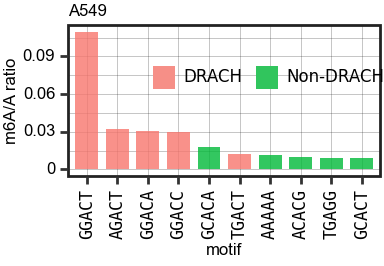

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [3]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


WT="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/A549.predict"

site_dict={}

with open(WT) as f:
    for line in f:
            line=line.rstrip()
            id="|".join(line.split("\t")[0:3])
            probability=float(line.split("\t")[5])
            if id not in site_dict:
                site_dict[id]=[0,0]
            if probability>0.98:
                site_dict[id][0]+=1
            site_dict[id][1]+=1

motif_dict={}
for id in site_dict:
    motif=id.split("|")[2]
    if motif not in motif_dict:
        motif_dict[motif]=[0,0]
    if site_dict[id][1]<5:
        continue
    if site_dict[id][0]/site_dict[id][1]>=0.5:
        motif_dict[motif][0]+=1
    motif_dict[motif][1] +=1  

    
diff_mod_dict={}
for motif in motif_dict:
    diff_mod_dict[motif]=motif_dict[motif][0]/motif_dict[motif][1]



black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

import re
kmer_fillter="[AGT][AG]AC[ACT]"

motifs=[]
diff_mod_rates=[]
DRACH=[]

for motif in diff_mod_dict:
    if diff_mod_dict[motif]>0.009:
        print(motif,diff_mod_dict[motif])
        motifs.append(motif)
        diff_mod_rates.append(diff_mod_dict[motif])
        if len([x.start() for x in re.finditer(kmer_fillter,motif)])==0:
            DRACH.append("Non-DRACH")
        else:
            DRACH.append("DRACH")
plt.rcParams["pdf.use14corefonts"] = True
data=pd.DataFrame({"motif":motifs,"m6A/A ratio":diff_mod_rates,"DRACH":DRACH})
data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['motif'] = pd.Categorical(data['motif'], categories=pd.unique(data['motif']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="motif",y="m6A/A ratio",fill="DRACH",width=0.75),alpha=0.8,stat="identity")   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Monospace",color="black",angle=90),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.92,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    #+ylim([0,0.20])
    #+xlim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    +labs(title='A549')
)

print(p)
p.save('figure/figure_5h_m6A_modified_motifs_A549.pdf')

#### HCT116

GGACT 0.14956331877729256
GGACA 0.03431372549019608
AAAAA 0.022894937674891886
GGACC 0.015901060070671377
TTAGT 0.007692307692307693
ATAGT 0.015
GCACT 0.009817671809256662
ACAGT 0.008225616921269096
AGACT 0.04431818181818182
TGACT 0.010559662090813094


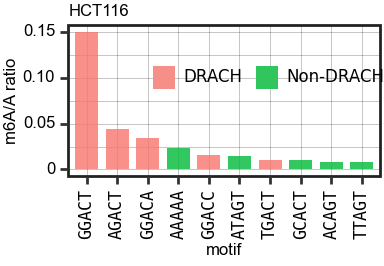

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [4]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np


WT="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/Hct116_extend.predict"

site_dict={}

with open(WT) as f:
    for line in f:
            line=line.rstrip()
            id="|".join(line.split("\t")[0:3])
            probability=float(line.split("\t")[5])
            if id not in site_dict:
                site_dict[id]=[0,0]
            if probability>0.98:
                site_dict[id][0]+=1
            site_dict[id][1]+=1

motif_dict={}
for id in site_dict:
    motif=id.split("|")[2]
    if motif not in motif_dict:
        motif_dict[motif]=[0,0]
    if site_dict[id][1]<10:
        continue
    if site_dict[id][0]/site_dict[id][1]>=0.5:
        motif_dict[motif][0]+=1
    motif_dict[motif][1] +=1  

    
diff_mod_dict={}
for motif in motif_dict:
    diff_mod_dict[motif]=motif_dict[motif][0]/motif_dict[motif][1]



black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

import re
kmer_fillter="[AGT][AG]AC[ACT]"

motifs=[]
diff_mod_rates=[]
DRACH=[]

for motif in diff_mod_dict:
    if diff_mod_dict[motif]>0.0074:
        print(motif,diff_mod_dict[motif])
        motifs.append(motif)
        diff_mod_rates.append(diff_mod_dict[motif])
        if len([x.start() for x in re.finditer(kmer_fillter,motif)])==0:
            DRACH.append("Non-DRACH")
        else:
            DRACH.append("DRACH")
plt.rcParams["pdf.use14corefonts"] = True
data=pd.DataFrame({"motif":motifs,"m6A/A ratio":diff_mod_rates,"DRACH":DRACH})
data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['motif'] = pd.Categorical(data['motif'], categories=pd.unique(data['motif']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="motif",y="m6A/A ratio",fill="DRACH",width=0.75),alpha=0.8,stat="identity")   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Monospace",color="black",angle=90),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.92,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    #+ylim([0,0.20])
    #+xlim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    +labs(title="HCT116")
)

print(p)
p.save('figure/figure_5i_m6A_modified_motifs_HCT116.pdf')

#### MCF7

GGACA 0.021810250817884406
AAAAA 0.01457518663348738
AAAGA 0.00754242614707731
GGACT 0.12125
AGACT 0.03314121037463977
TGACT 0.01098901098901099
CGAAA 0.007692307692307693
GGACC 0.02021276595744681
CTAGC 0.0076045627376425855
GGACG 0.0075


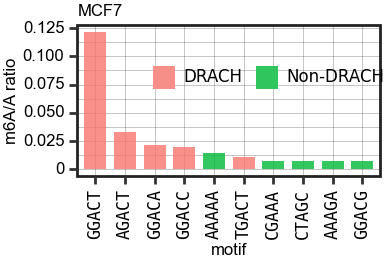

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [5]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np

WT="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/MCF7.predict"

site_dict={}

with open(WT) as f:
    for line in f:
            line=line.rstrip()
            id="|".join(line.split("\t")[0:3])
            probability=float(line.split("\t")[5])
            if id not in site_dict:
                site_dict[id]=[0,0]
            if probability>0.98:
                site_dict[id][0]+=1
            site_dict[id][1]+=1

motif_dict={}
for id in site_dict:
    motif=id.split("|")[2]
    if motif not in motif_dict:
        motif_dict[motif]=[0,0]
    if site_dict[id][1]<10:
        continue
    if site_dict[id][0]/site_dict[id][1]>=0.5:
        motif_dict[motif][0]+=1
    motif_dict[motif][1] +=1  

    
diff_mod_dict={}
for motif in motif_dict:
    diff_mod_dict[motif]=motif_dict[motif][0]/motif_dict[motif][1]



black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

import re
kmer_fillter="[AGT][AG]AC[ACT]"

motifs=[]
diff_mod_rates=[]
DRACH=[]

for motif in diff_mod_dict:
    if diff_mod_dict[motif]>0.006:
        print(motif,diff_mod_dict[motif])
        motifs.append(motif)
        diff_mod_rates.append(diff_mod_dict[motif])
        if len([x.start() for x in re.finditer(kmer_fillter,motif)])==0:
            DRACH.append("Non-DRACH")
        else:
            DRACH.append("DRACH")
plt.rcParams["pdf.use14corefonts"] = True
data=pd.DataFrame({"motif":motifs,"m6A/A ratio":diff_mod_rates,"DRACH":DRACH})
data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['motif'] = pd.Categorical(data['motif'], categories=pd.unique(data['motif']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="motif",y="m6A/A ratio",fill="DRACH",width=0.75),alpha=0.8,stat="identity")   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Monospace",color="black",angle=90),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.92,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    #+ylim([0,0.20])
    #+xlim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    +labs(title="MCF7")
)

print(p)
p.save('figure/figure_5j_m6A_modified_motifs_MCF7.pdf')

#### HEPG2

GGACC 0.00980392156862745
GGACA 0.023608768971332208
GGACG 0.008264462809917356
AGACA 0.011111111111111112
ACAGA 0.007518796992481203
AGACT 0.03294117647058824
AAAGA 0.007438894792773645
ATAGA 0.01015228426395939
TTAGT 0.005235602094240838
GGACT 0.10983981693363844


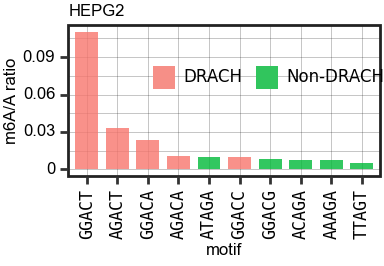

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [7]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np

WT="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/HepG2.predict"

site_dict={}

with open(WT) as f:
    for line in f:
            line=line.rstrip()
            id="|".join(line.split("\t")[0:3])
            probability=float(line.split("\t")[5])
            if id not in site_dict:
                site_dict[id]=[0,0]
            if probability>0.98:
                site_dict[id][0]+=1
            site_dict[id][1]+=1

motif_dict={}
for id in site_dict:
    motif=id.split("|")[2]
    if motif not in motif_dict:
        motif_dict[motif]=[0,0]
    if site_dict[id][1]<10:
        continue
    if site_dict[id][0]/site_dict[id][1]>=0.5:
        motif_dict[motif][0]+=1
    motif_dict[motif][1] +=1  

    
diff_mod_dict={}
for motif in motif_dict:
    diff_mod_dict[motif]=motif_dict[motif][0]/motif_dict[motif][1]



black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

import re
kmer_fillter="[AGT][AG]AC[ACT]"

motifs=[]
diff_mod_rates=[]
DRACH=[]

for motif in diff_mod_dict:
    if diff_mod_dict[motif]>0.0052:
        print(motif,diff_mod_dict[motif])
        motifs.append(motif)
        diff_mod_rates.append(diff_mod_dict[motif])
        if len([x.start() for x in re.finditer(kmer_fillter,motif)])==0:
            DRACH.append("Non-DRACH")
        else:
            DRACH.append("DRACH")
plt.rcParams["pdf.use14corefonts"] = True
data=pd.DataFrame({"motif":motifs,"m6A/A ratio":diff_mod_rates,"DRACH":DRACH})
data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['motif'] = pd.Categorical(data['motif'], categories=pd.unique(data['motif']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="motif",y="m6A/A ratio",fill="DRACH",width=0.75),alpha=0.8,stat="identity")   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Monospace",color="black",angle=90),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.92,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    #+ylim([0,0.20])
    #+xlim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    +labs(title="HEPG2")
)

print(p)
p.save('figure/figure_5k_m6A_modified_motifs_HEPG2.pdf')

#### K562

AGACT 0.04908835904628331
GGACG 0.007712082262210797
GGACT 0.14304461942257218
AAAGA 0.007398273736128237
AAAAA 0.033883388338833885
AGACA 0.00641025641025641
ACACA 0.015643802647412757
GGACA 0.030864197530864196
GGACC 0.016166281755196306
AGAGA 0.006314127861089187


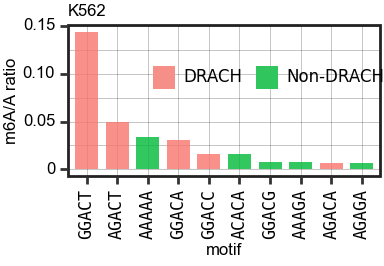

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [8]:
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import numpy as np

WT="/home/wuyou/Projects/human_HEK293T_nanopore/cell_lines/results/K562_extend.predict"

site_dict={}

with open(WT) as f:
    for line in f:
            line=line.rstrip()
            id="|".join(line.split("\t")[0:3])
            probability=float(line.split("\t")[5])
            if id not in site_dict:
                site_dict[id]=[0,0]
            if probability>0.98:
                site_dict[id][0]+=1
            site_dict[id][1]+=1

motif_dict={}
for id in site_dict:
    motif=id.split("|")[2]
    if motif not in motif_dict:
        motif_dict[motif]=[0,0]
    if site_dict[id][1]<10:
        continue
    if site_dict[id][0]/site_dict[id][1]>=0.5:
        motif_dict[motif][0]+=1
    motif_dict[motif][1] +=1  

    
diff_mod_dict={}
for motif in motif_dict:
    diff_mod_dict[motif]=motif_dict[motif][0]/motif_dict[motif][1]



black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
c1="#F8766D"
c2="#00BA38" 
c3="#619CFF"

import re
kmer_fillter="[AGT][AG]AC[ACT]"

motifs=[]
diff_mod_rates=[]
DRACH=[]

for motif in diff_mod_dict:
    if diff_mod_dict[motif]>0.0062:
        print(motif,diff_mod_dict[motif])
        motifs.append(motif)
        diff_mod_rates.append(diff_mod_dict[motif])
        if len([x.start() for x in re.finditer(kmer_fillter,motif)])==0:
            DRACH.append("Non-DRACH")
        else:
            DRACH.append("DRACH")
plt.rcParams["pdf.use14corefonts"] = True
data=pd.DataFrame({"motif":motifs,"m6A/A ratio":diff_mod_rates,"DRACH":DRACH})
data=data.sort_values(by=['m6A/A ratio'],ascending=False)        #sort
data['motif'] = pd.Categorical(data['motif'], categories=pd.unique(data['motif']))  #reorder legend

p=(
    ggplot()
    +geom_bar(data,aes(x="motif",y="m6A/A ratio",fill="DRACH",width=0.75),alpha=0.8,stat="identity")   
    
    #+scale_x_continuous(breaks = [0,100,200,300],labels =["               5'UTR", "                CDS", "                3'UTR",""])
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            strip_text_x = element_text(size = 6),            #facet font size
            #legend_position = "none",
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text_x=element_text(size=6,family="Monospace",color="black",angle=90),
            axis_text_y=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[1.92,1.33],
            legend_title = element_text(size=6,alpha=0), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            legend_position=(0.70,0.75), 
            legend_key_size=8) #change legend text font size)
    #+ geom_vline(xintercept=100,linetype="dashed",alpha=0.5)
    #+ geom_vline(xintercept=200,linetype="dashed",alpha=0.5)
    #+ylim([0,0.20])
    #+xlim([0,0.20])
    +scale_fill_manual(values=[c1, c2, c3]) 
    +labs(title="K562")
)

print(p)
p.save('figure/figure_5l_m6A_modified_motifs_K562.pdf')